# Poisson Equation
## The Differential Equation
$$  \frac{\partial^2 u}{\partial y^2} + \frac{\partial^2 u}{\partial x^2}=f(x,y)$$

$$  \frac{\partial^2 u}{\partial y^2} + \frac{\partial^2 u}{\partial x^2}=xy$$


## Boundary Condition
$$ u(x,0)=x^2-x, $$
$$ u(x,1)=-x^2+x, $$
$$ u(0,y)=y^2-y, $$
$$ u(1,y)=-y^2+y, $$

## The Difference Equation
$$ w[i-1,j]+ w[i,j-1] -4w[i,j]+w[i,j+1]+w[i+1,j]=h^2(x[i]y[j])$$


In [3]:
# LIBRARY
# vector manipulation
import numpy as np
# math functions
import math 

# THIS IS FOR PLOTTING

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")


[-0.1875 -0.25   -0.1875 -0.     -0.     -0.      0.1875  0.25    0.1875]
[-0.375 -0.25  -0.375 -0.25  -0.    -0.25  -0.     0.25  -0.   ]


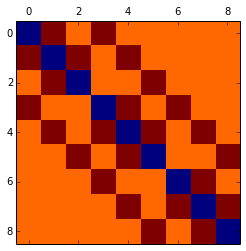

[[-4.  1.  0.  1.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  1.  0.  0.  0.  0.]
 [ 0.  1. -4.  0.  0.  1.  0.  0.  0.]
 [ 1.  0.  0. -4.  1.  0.  1.  0.  0.]
 [ 0.  1.  0.  1. -4.  1.  0.  1.  0.]
 [ 0.  0.  1.  0.  1. -4.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.  0. -4.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  1. -4.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  1. -4.]]
[ 0.00390625  0.0078125   0.01171875  0.0078125   0.015625    0.0234375
  0.01171875  0.0234375   0.03515625]
[ 0.375  0.25   0.375  0.25   0.     0.25   0.    -0.25   0.   ]


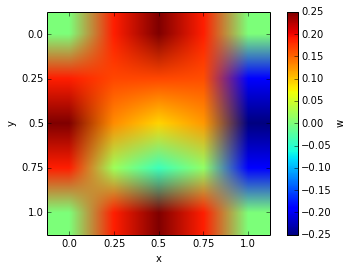

In [4]:
N=5
h=1/(N-1)


x=np.arange(0,1.0001,h)
y=np.arange(0,1.0001,h)

N2=(N-2)*(N-2)
A=np.zeros((N2,N2))
C=np.zeros((N,N))


f=np.zeros(N2)

w=np.zeros(N2)

b=np.zeros(N2)


for i in range (0,N):
        C[i,0]=-x[i]*(x[i]-1)#left Boundary
        C[i,N-1]=x[i]*(x[i]-1) #Right Boundary

for j in range (0,N):
        C[0,j]=-y[j]*(y[j]-1)#Lower Boundary
        C[N-1,j]=-y[j]*(y[j]-1) #Upper Boundary
        
        
for i in range (0,N-2):
        b[i]=-x[i+1]*(x[i+1]-1) #left Boundary
        b[i+(N-2)*(N-3)]=x[i+1]*(x[i+1]-1)# Right Boundary
      
print(-b)
    
for j in range (0,N-2):
        b[(N-2)*j]=b[(N-2)*j]-y[j+1]*(y[j+1]-1)# Lower Boundary
        b[N-3+(N-2)*j]=b[N-3+(N-2)*j]-y[j+1]*(y[j+1]-1)# Upper Boundary

                          
print(-b)

            
for i in range (0,N-2):
    for j in range (0,N-2):           
        A[i+(N-2)*j,i+(N-2)*j]=-4
        f[i+(N-2)*j]=h*h*(x[i+1]*y[j+1])


        
for i in range (1,N-2):
    for j in range (0,N-2):           
        A[i+(N-2)*j,i+(N-2)*j-1]=1

for i in range (0,N-3):
    for j in range (0,N-2):           
        A[i+(N-2)*j,i+(N-2)*j+1]=1
      
for i in range (0,N-2):
    for j in range (0,N-3):           
        A[i+(N-2)*j,i+(N-2)*(j+1)]=1
      

for i in range (0,N-2):
    for j in range (1,N-2):           
        A[i+(N-2)*j,i+(N-2)*(j-1)]=1


fig = plt.figure(figsize=(8,4))
plt.matshow(A)
plt.show()
print(A)
Ainv=np.linalg.inv(A)

w=np.dot(Ainv,f-b)
print(f)
print(b)
#print(f-b)


C[1:N-1,1:N-1]=w.reshape((N-2,N-2))
fig = plt.figure()
plt.imshow(C)
plt.xticks(np.arange(len(x)), x)
plt.yticks(np.arange(len(y)), y.transpose())
plt.xlabel('x')
plt.ylabel('y')
clb=plt.colorbar()
clb.set_label('w')

plt.show()

